In [45]:
import pandas as pd
import os
import numpy as np

In [27]:
## confused what are their second language
## for AOA group, what's the definition?

In [46]:
data = pd.read_csv('/projects/sccn/weili_A1/liacz/Data/Bilingualism_CVAE/Hernandez/All Descriptive Data/Corrected2018_DataforMRIs DO NOT EDIT.csv')
data = data.replace('unknown', pd.NA)
data = data.fillna(np.nan)
data

,fsid,LanguageGroup,Gender,AoA Group,AoA,Age,YearsEnglishEdu,YearsSpanishEdu,PercentEngPictureVocabulary,PercentEngPassageComprehension,...,BirthPlace,StudyName,PercentEngListeningComprehension,PercentSpanListeningComprehension,BNTEnglish,BNTSpanish,DailyE,DailyS,Eprof,Sprof
0,Sub01FS,Bilingual,F,Late,7,18.0,8.0,6.0,0.661017,0.787879,...,US,CognitiveControl,NaN,NaN,NaN,NaN,0.8,0.2,0.724448,0.699666
1,Sub02FS,Bilingual,F,Late,10,22.0,12.0,22.0,0.711864,0.696970,...,US,CognitiveControl,NaN,NaN,NaN,NaN,0.75,0.25,0.704417,0.646830
2,Sub03FS,Bilingual,M,Late,11,19.0,12.0,11.0,0.610169,0.757576,...,Else,CognitiveControl,NaN,NaN,NaN,NaN,0.5,0.5,0.683873,0.748053
3,Sub04FS,Bilingual,M,Early,4,20.0,11.0,2.0,0.694915,0.848485,...,US,CognitiveControl,NaN,NaN,NaN,NaN,0.9,0.1,0.771700,0.692158
4,Sub05FS,Bilingual,M,Late,8,23.0,15.0,22.0,0.694915,0.848485,...,US,CognitiveControl,NaN,NaN,NaN,NaN,0.7,0.3,0.771700,0.845940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,UH_T,Monolingual,F,Mono,NaN,19.0,NaN,NaN,0.762712,NaN,...,US,PhonemicLearning,0.818182,NaN,NaN,NaN,1,0,0.790447,NaN
359,UH_U,Monolingual,M,Mono,NaN,21.0,NaN,NaN,0.779661,NaN,...,US,PhonemicLearning,0.939394,NaN,NaN,NaN,1,0,0.859527,NaN
360,UH_V,Bilingual,M,Early,4,18.0,14.0,NaN,0.677966,NaN,...,US,PhonemicLearning,0.727273,0.53125,NaN,NaN,0.65,0.35,0.702619,0.532866
361,UH_Y,Bilingual,F,Late,10,22.0,NaN,NaN,0.678000,NaN,...,NaN,PhonemicLearning,0.757500,0.7813,NaN,NaN,none,none,0.717750,0.752700


In [30]:
data.columns

Index(['fsid', 'LanguageGroup', 'Gender', 'AoA Group', 'AoA', 'Age',
       'YearsEnglishEdu', 'YearsSpanishEdu', 'PercentEngPictureVocabulary',
       'PercentEngPassageComprehension', 'PercentSpanPictureVocabulary',
       'PercentSpanPassageComprehension', 'Mom_Edu', 'Dad_Edu', 'SES',
       'BirthPlace', 'StudyName', 'PercentEngListeningComprehension',
       'PercentSpanListeningComprehension', 'BNTEnglish', 'BNTSpanish',
       'DailyE', 'DailyS', 'Eprof', 'Sprof'],
      dtype='object')

In [31]:
data[['Eprof', 'Sprof', 'AoA']].corr(method='pearson')

,Eprof,Sprof,AoA
Eprof,1.000000,0.227533,-0.367547
Sprof,0.227533,1.000000,0.407527
AoA,-0.367547,0.407527,1.000000


In [8]:
#check the subs' information, 1 missing demographic information
# brain_subs = np.load(os.path.expanduser('~/Documents/Bilingualism_CVAE/data/array_brains/Anat-Bilingual-64iso-Hernandez-S361.npz'))['subs']
# subs = [brain_subs[i][:-4] for i in range(0,len(brain_subs))]
# name_overlap = [sub in data.fsid.tolist() for sub in subs]
# 'Sub01FS' in data.fsid
# n = 0
# for i in name_overlap:
    
#     if not i:
#         print("The first false value is:", n)
#         break
#     n = n+1
# name_overlap[121]
# subs[121]
# data.fsid.tolist()

In [32]:
data = data.copy()

In [33]:
data.loc[:,'participant_id'] = data.loc[:,('fsid')]
data.loc[:,'sex'] = data.loc[:,('Gender')]

In [34]:
data.loc[data['LanguageGroup']=='Bilingual','bilingualism'] = 1
data.loc[data['LanguageGroup']=='Monolingual','bilingualism'] = 0
data.bilingualism.value_counts()

bilingualism
1.0    218
0.0    145
Name: count, dtype: int64

<Axes: >

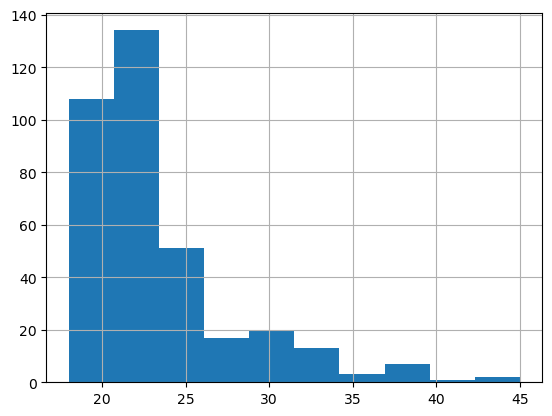

In [35]:
data.loc[:, 'age'] = data.loc[:,'Age']
data.age.hist()

<Axes: >

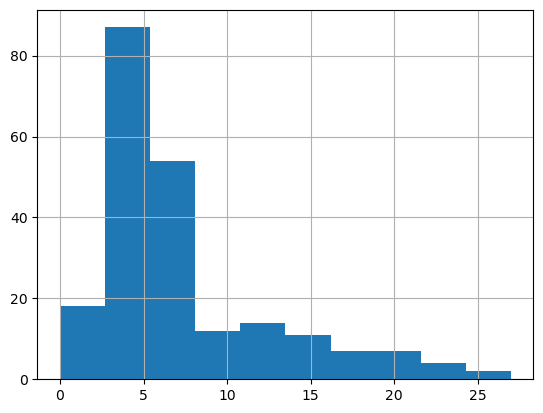

In [36]:
data.loc[:, 'aoa'] = data.loc[:,'AoA'].astype(float)
data.loc[:, 'aoa'].hist()

In [37]:
data['AoA Group'].value_counts()

AoA Group
Mono     145
Early    108
Late      81
Sim       27
Name: count, dtype: int64

In [38]:
data.loc[data['AoA Group']=='Late', 'aoa_group'] = 'LB'
data.loc[data['AoA Group']=='Early', 'aoa_group'] = 'EB'
data.loc[data['AoA Group']=='Sim', 'aoa_group'] = 'EB'
data.loc[data['AoA Group']=='Mono', 'aoa_group'] = pd.NA
data.aoa_group.value_counts()

aoa_group
EB    135
LB     81
Name: count, dtype: int64

In [39]:
data.loc[:, 'sec_lan_proficiency'] = data.loc[:, 'Eprof']
data.loc[:, 'fst_lan_proficiency'] = data.loc[:, 'Sprof']

In [40]:
data.loc[:, 'ds']='Hernandez'

In [41]:
data.loc[:, 'scanner']='Hernandez'

In [42]:
legend = data.loc[:, ['participant_id', 'bilingualism', 'age', 'sex', 
              'aoa', 'aoa_group', 'sec_lan_proficiency', 'fst_lan_proficiency',
              'ds', 'scanner']]

In [43]:
legend[['aoa', 'sec_lan_proficiency', 'fst_lan_proficiency']].corr(method='pearson')

,aoa,sec_lan_proficiency,fst_lan_proficiency
aoa,1.000000,-0.367547,0.407527
sec_lan_proficiency,-0.367547,1.000000,0.227533
fst_lan_proficiency,0.407527,0.227533,1.000000


In [44]:
legend.to_csv('/projects/sccn/weili_A1/liacz/Documents/Bilingualism_CVAE/data/legend/Hernandez.csv',index = False)